In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### step 1:Load the data and perform the basic EDA to understand the data.


In [48]:
df=pd.read_csv(r"C:\Users\Suri\Downloads\insurance.csv")

In [49]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [50]:
df.shape

(1338, 7)

In [51]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

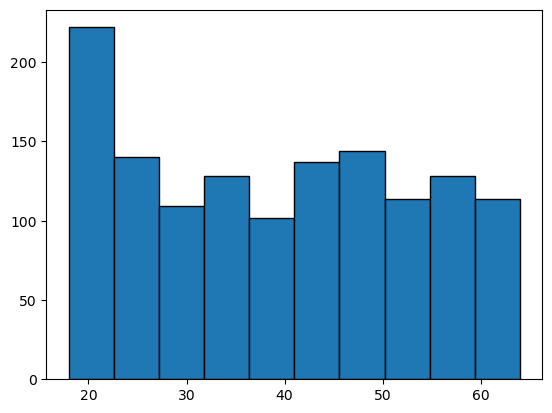

In [52]:
plt.hist(df["age"],edgecolor="black")
plt.show()

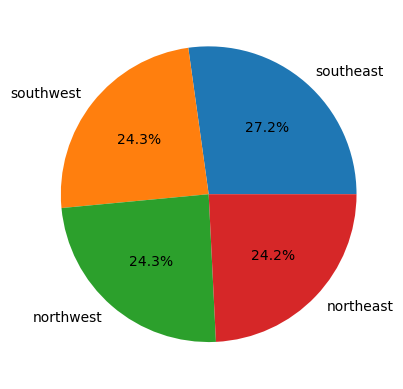

In [53]:
plt.pie(places_count,labels=places_count.index,autopct="%.1f%%")
plt.show()

In [54]:
places_count=df["region"].value_counts()

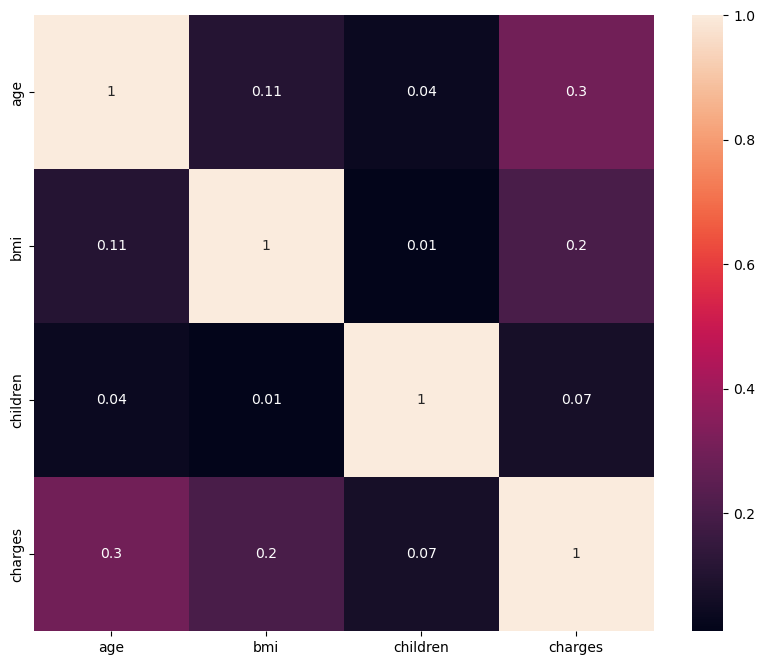

In [55]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr().round(2),annot=True)
plt.show()

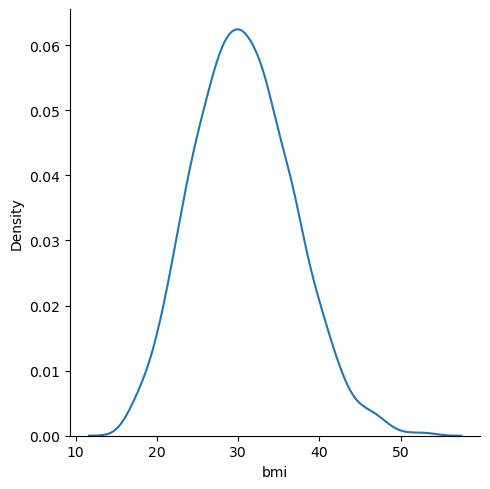

In [56]:
sns.displot(x="bmi",data=df,kind='kde')
plt.show()

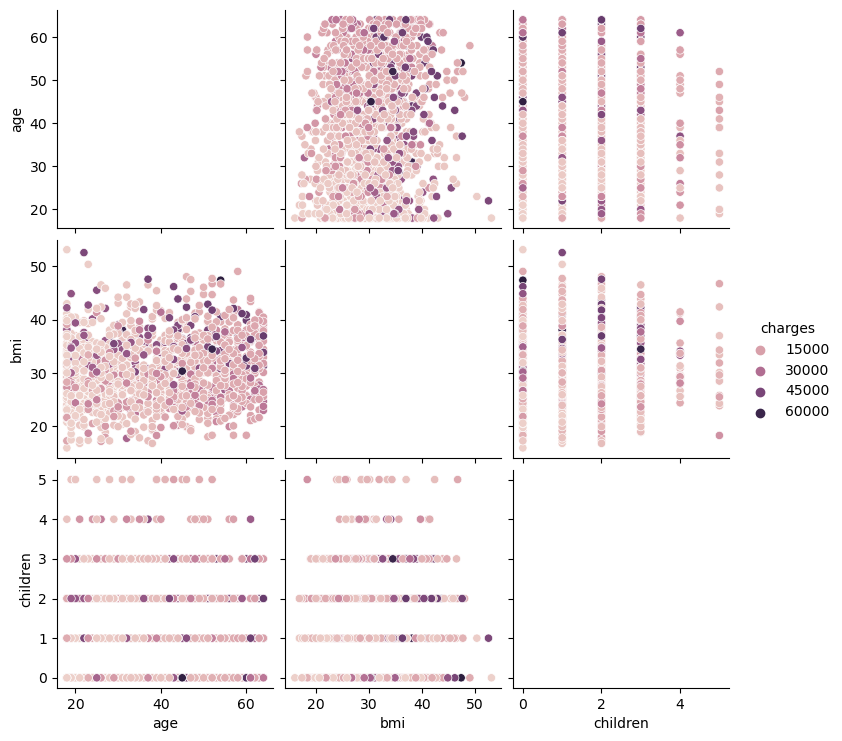

In [57]:
sns.pairplot(df,hue="charges")
plt.show()

###  Step 2: Document the below mentioned points properly: 
 
Q)Identify the input and output/target variables. 
A)Input variables =age,sex,bmi,children,smoker,region	
  Output variables=charges

Q)Identify the type of ML Task.
A)Regression

Q)Identify the Evaluation Metric.
A)For regression task - Mean Absolute Error
	


### Step 3:Split the dataset into Training and Testing (recommended 75:25 split).


In [58]:
X=df.drop(columns={"charges"})
y=df["charges"]

In [59]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [60]:
print(X_train.shape, y_train.shape)

print(X_test.shape, y_test.shape)

(1003, 6) (1003,)
(335, 6) (335,)


In [61]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

### Step 4: Data preparation on train data and test data :
 For Numerical Variables - Standardization  (Fit and Transform) for Train Data,Standardization(Transfrom) for test Data
 
 For Categorical - OneHotEncoding (Choose wisely)


In [62]:
X_train_num=X_train.select_dtypes(include=["int64","float64"],)
X_test_num=X_test.select_dtypes(include=["int64","float64"])

In [63]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

In [64]:
X_train_num.head()

,age,bmi,children
1075,32,29.59,1
131,61,22.04,0
15,19,24.60,1
1223,20,24.42,0
1137,26,22.23,0


In [65]:
X_train_num=pd.DataFrame(scaler.fit_transform(X_train_num),columns=X_train_num.columns,index=X_train_num.index)

In [66]:
X_test_num=pd.DataFrame(scaler.transform(X_test_num),columns=X_test_num.columns,index=X_test_num.index)

In [67]:
X_train_num

,age,bmi,children
1075,-0.514853,-0.181331,-0.063607
131,1.548746,-1.393130,-0.892144
15,-1.439915,-0.982242,-0.063607
1223,-1.368757,-1.011133,-0.892144
1137,-0.941805,-1.362635,-0.892144
...,...,...,...
763,-0.870646,-0.752723,-0.892144
835,0.196733,0.842680,0.764931
1216,0.054415,-0.905201,-0.892144
559,-1.439915,0.772058,-0.892144


In [68]:
X_train_cat=X_train.select_dtypes(include=["object"])
X_test_cat=X_test.select_dtypes(include=["object"])

In [69]:
from sklearn.preprocessing import OneHotEncoder

In [70]:
encoder=OneHotEncoder(drop='first',sparse=False)

In [71]:
X_train_cat = pd.DataFrame(encoder.fit_transform(X_train_cat), 
                               columns=encoder.get_feature_names_out(X_train_cat.columns), 
                               index = X_train_cat.index)

In [72]:
X_train_cat.head()

,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
1075,0.0,0.0,0.0,1.0,0.0
131,0.0,0.0,0.0,0.0,0.0
15,1.0,0.0,0.0,0.0,1.0
1223,0.0,1.0,0.0,1.0,0.0
1137,0.0,0.0,1.0,0.0,0.0


In [73]:
X_test_cat=pd.DataFrame(encoder.transform(X_test_cat), 
                               columns=encoder.get_feature_names_out(X_test_cat.columns), 
                               index = X_test_cat.index)

In [74]:
X_test_cat.head()

,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
578,1.0,0.0,0.0,0.0,1.0
610,0.0,0.0,0.0,1.0,0.0
569,1.0,1.0,1.0,0.0,0.0
1034,1.0,0.0,1.0,0.0,0.0
198,0.0,0.0,1.0,0.0,0.0


In [75]:
X_train_cat

,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
1075,0.0,0.0,0.0,1.0,0.0
131,0.0,0.0,0.0,0.0,0.0
15,1.0,0.0,0.0,0.0,1.0
1223,0.0,1.0,0.0,1.0,0.0
1137,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...
763,1.0,0.0,0.0,0.0,0.0
835,1.0,0.0,0.0,1.0,0.0
1216,1.0,0.0,0.0,1.0,0.0
559,1.0,0.0,1.0,0.0,0.0


In [76]:
cat=df.select_dtypes(include=["object"])

In [77]:
cat.nunique()

sex       2
smoker    2
region    4
dtype: int64

In [78]:
X_train_tranformed=pd.concat([X_train_num,X_train_cat],axis=1)

In [79]:
X_test_tranformed=pd.concat([X_test_num,X_test_cat],axis=1)

In [80]:
X_train_tranformed

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
1075,-0.514853,-0.181331,-0.063607,0.0,0.0,0.0,1.0,0.0
131,1.548746,-1.393130,-0.892144,0.0,0.0,0.0,0.0,0.0
15,-1.439915,-0.982242,-0.063607,1.0,0.0,0.0,0.0,1.0
1223,-1.368757,-1.011133,-0.892144,0.0,1.0,0.0,1.0,0.0
1137,-0.941805,-1.362635,-0.892144,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
763,-0.870646,-0.752723,-0.892144,1.0,0.0,0.0,0.0,0.0
835,0.196733,0.842680,0.764931,1.0,0.0,0.0,1.0,0.0
1216,0.054415,-0.905201,-0.892144,1.0,0.0,0.0,1.0,0.0
559,-1.439915,0.772058,-0.892144,1.0,0.0,1.0,0.0,0.0


In [81]:
X_test_tranformed

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
578,0.908319,-0.083424,-0.063607,1.0,0.0,0.0,0.0,1.0
610,0.552526,-0.216642,-0.063607,0.0,0.0,0.0,1.0,0.0
569,0.623684,1.580192,0.764931,1.0,1.0,1.0,0.0,0.0
1034,1.548746,1.229492,-0.892144,1.0,0.0,1.0,0.0,0.0
198,0.837160,-2.033538,-0.892144,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
574,1.264112,0.573837,0.764931,0.0,0.0,0.0,0.0,0.0
1174,-0.728329,0.223137,0.764931,1.0,0.0,1.0,0.0,0.0
1327,0.837160,-0.110710,-0.063607,1.0,0.0,0.0,1.0,0.0
817,-1.155281,1.024048,1.593468,1.0,0.0,0.0,0.0,1.0


### Step 5:Model Training Phase - Use all the algorithms mentioned below to train separate models:
- KNN
- Logistic Regression / Linear Regression
- Support Vector Machines
- Decision Trees
- Random Forest


# Linear Regression

In [82]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_tranformed, y_train)

LinearRegression()

In [83]:
y_test_pred=regressor.predict(X_test_tranformed)

In [84]:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  4012.715276853087
Mean Squared Error:  32135747.239381783
Root Mean Squared Error:  5668.8400259119835


In [85]:
Linear_Regression= metrics.mean_absolute_error(y_test, y_test_pred)

# KNN

In [86]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor()
regressor.fit(X_train_tranformed, y_train)

KNeighborsRegressor()

In [87]:
y_test_pred=regressor.predict(X_test_tranformed)

In [88]:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  4146.4536904686565
Mean Squared Error:  45611979.05104784
Root Mean Squared Error:  6753.664120390341


In [89]:
KNN= metrics.mean_absolute_error(y_test, y_test_pred)

# Decision Tree Regression

In [90]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train_tranformed, y_train)

DecisionTreeRegressor()

In [91]:
y_test_pred=regressor.predict(X_test_tranformed)

In [92]:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  3298.239108355224
Mean Squared Error:  47481838.13301085
Root Mean Squared Error:  6890.7066497574


In [93]:
Decision_Tree= metrics.mean_absolute_error(y_test, y_test_pred)

# Random Forest Regression

In [94]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(X_train_tranformed, y_train)

RandomForestRegressor()

In [95]:
y_test_pred=regressor.predict(X_test_tranformed)

In [96]:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  2656.686722475547
Mean Squared Error:  19698792.803311814
Root Mean Squared Error:  4438.332209660721


In [97]:
Random_Forest= metrics.mean_absolute_error(y_test, y_test_pred)

# Suppot Vector Regression

In [98]:
from sklearn.svm import SVR
regressor=SVR()
regressor.fit(X_train_tranformed, y_train)

SVR()

In [99]:
y_test_pred=regressor.predict(X_test_tranformed)

In [100]:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  8545.93890360446
Mean Squared Error:  172599496.34079322
Root Mean Squared Error:  13137.712751494959


In [101]:
Support_Vector_Regression= metrics.mean_absolute_error(y_test, y_test_pred)

### Display a plot which shows all the algorithms applied along with the scores achieved. Write your conclusion on the best algorithm for the Medical Cost Prediction problem.



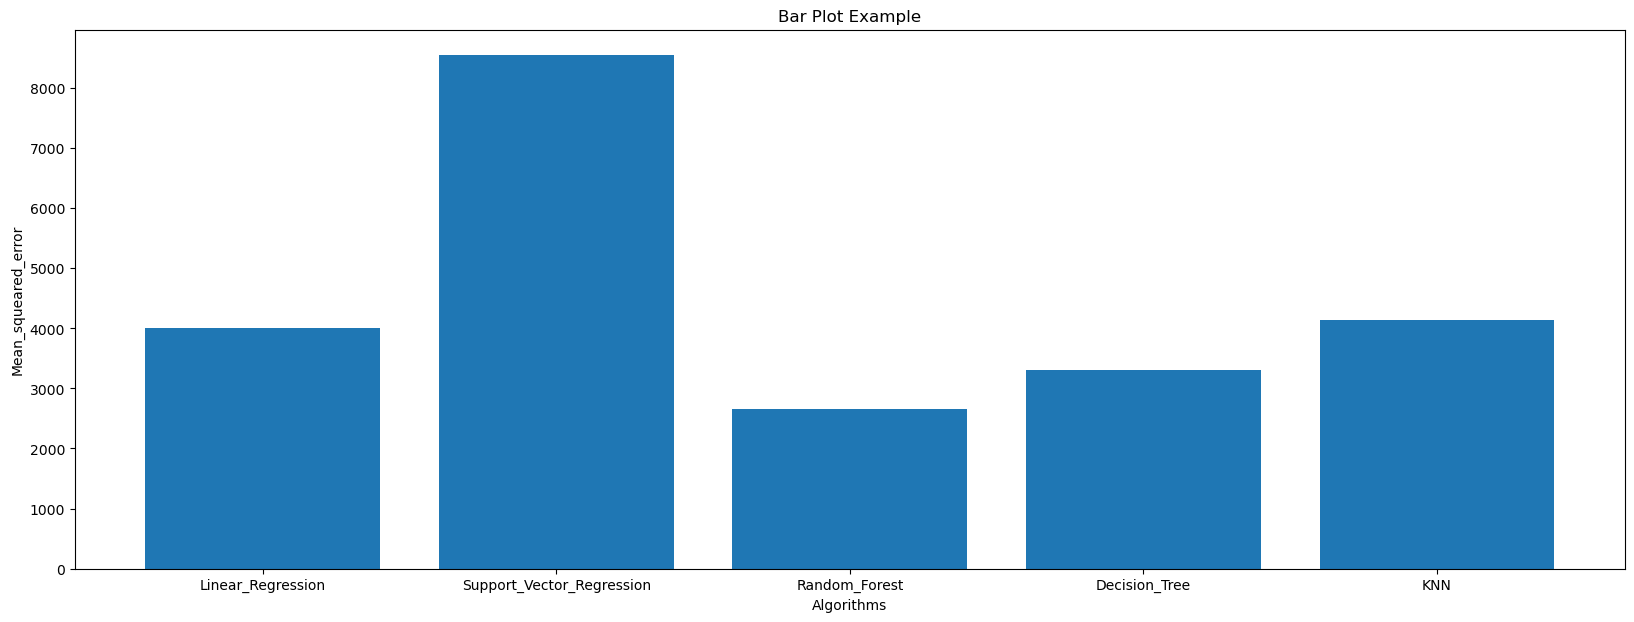

In [108]:
categories = ['Linear_Regression', 'Support_Vector_Regression', 'Random_Forest',"Decision_Tree", 'KNN']
values = [Linear_Regression, Support_Vector_Regression,Random_Forest,Decision_Tree,KNN]
plt.figure(figsize=(20,7))
# Create a bar plot
plt.bar(categories, values)

# Adding labels and a title
plt.xlabel('Algorithms')
plt.ylabel('Mean_squeared_error')
plt.title('Bar Plot Example')

# Show the plot
plt.show()

    From the above the graph we can conclude that mean_squared error is less for Random_Forest error is low so it is best algorithm to predict the insurance charges 